The following codes are intended only as an exploration from the perspective of NLP.

In [1]:
import pandas as pd 
import numpy as np 
from IPython.display import display

import matplotlib.pyplot as plt 
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')


from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sthan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sthan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df=pd.read_csv('Bitcoin_tweets.csv')

C:\Users\sthan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df['Date'] = pd.to_datetime(df['user_created'],format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [4]:
df['Dates'] = pd.to_datetime(df['Date']).dt.date
df['Time'] = pd.to_datetime(df['Date']).dt.time

In [5]:
df.shape

(1232809, 16)

In [6]:
df.head(2)

user_name user_location  \
0  DeSota Wilson   Atlanta, GA   
1       CryptoND           NaN   

                                    user_description         user_created  \
0  Biz Consultant, real estate, fintech, startups...  2009-04-26 20:05:09   
1  😎 BITCOINLIVE is a Dutch platform aimed at inf...  2019-10-17 20:12:10   

   user_followers user_friends user_favourites user_verified  \
0          8534.0         7605            4838         False   
1          6769.0         1532           25483         False   

                  date                                               text  \
0  2021-02-10 23:59:04  Blue Ridge Bank shares halted by NYSE after #b...   
1  2021-02-10 23:58:48  😎 Today, that's this #Thursday, we will do a "...   

                                    hashtags               source is_retweet  \
0                                ['bitcoin']      Twitter Web App      False   
1  ['Thursday', 'Btc', 'wallet', 'security']  Twitter for Android      False   

                 Date       Dates      Time  
0 2009-04-26 20:05:09  2009-04-26  20:05:09  
1 2019-10-17 20:12:10  2019-10-17  20:12:10

In [7]:
needed_columns=['user_name','Dates','text']
df=df[needed_columns]
df.head()

user_name       Dates  \
0                             DeSota Wilson  2009-04-26   
1                                  CryptoND  2019-10-17   
2                                 Tdlmatias  2014-11-10   
3                      Crypto is the future  2019-09-28   
4  Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader  2016-02-03   

                                                text  
0  Blue Ridge Bank shares halted by NYSE after #b...  
1  😎 Today, that's this #Thursday, we will do a "...  
2  Guys evening, I have read this article about B...  
3  $BTC A big chance in a billion! Price: \487264...  
4  This network is secured by 9 508 nodes as of t...

In [10]:
df.user_name=df.user_name.astype('category')

df.Dates=pd.to_datetime(df.Dates).dt.date

In [11]:
df.head(3)

user_name       Dates                                               text
0     51695  2009-04-26  Blue Ridge Bank shares halted by NYSE after #b...
1     44916  2019-10-17  😎 Today, that's this #Thursday, we will do a "...
2    159669  2014-11-10  Guys evening, I have read this article about B...

In the next lines, we are going to work with the tweets (text) it self 

In [12]:
tweets=df.text
tweets

0          Blue Ridge Bank shares halted by NYSE after #b...
1          😎 Today, that's this #Thursday, we will do a "...
2          Guys evening, I have read this article about B...
3          $BTC A big chance in a billion! Price: \487264...
4          This network is secured by 9 508 nodes as of t...
                                 ...                        
1232804    @SpeedUpBSC @debi_pada @AdaTiers @golf_grinder...
1232805    This time, what will happen between the US SEC...
1232806                          One #btc is only 205 #EGLD.
1232807    Want to join a group that posted TSLA 745P day...
1232808    cabanacrypto is live! @CabanaCrypto\n\n"HEX Ha...
Name: text, Length: 1232809, dtype: object

In [13]:
#removing URLs 
remove_url=lambda x:re.sub(r'http\S+','',str(x))
tweets_lr=tweets.apply(remove_url)
tweets_lr

0          Blue Ridge Bank shares halted by NYSE after #b...
1          😎 Today, that's this #Thursday, we will do a "...
2          Guys evening, I have read this article about B...
3          $BTC A big chance in a billion! Price: \487264...
4          This network is secured by 9 508 nodes as of t...
                                 ...                        
1232804    @SpeedUpBSC @debi_pada @AdaTiers @golf_grinder...
1232805    This time, what will happen between the US SEC...
1232806                          One #btc is only 205 #EGLD.
1232807    Want to join a group that posted TSLA 745P day...
1232808    cabanacrypto is live! @CabanaCrypto\n\n"HEX Ha...
Name: text, Length: 1232809, dtype: object

In [14]:
#convertring tweets to lowercase 
to_lower=lambda x: x.lower()
tweets_lr_lc=tweets_lr.apply(to_lower)
tweets_lr_lc

0          blue ridge bank shares halted by nyse after #b...
1          😎 today, that's this #thursday, we will do a "...
2          guys evening, i have read this article about b...
3          $btc a big chance in a billion! price: \487264...
4          this network is secured by 9 508 nodes as of t...
                                 ...                        
1232804    @speedupbsc @debi_pada @adatiers @golf_grinder...
1232805    this time, what will happen between the us sec...
1232806                          one #btc is only 205 #egld.
1232807    want to join a group that posted tsla 745p day...
1232808    cabanacrypto is live! @cabanacrypto\n\n"hex ha...
Name: text, Length: 1232809, dtype: object

In [15]:
#removing punctations 
remove_puncs= lambda x:x.translate(str.maketrans('','',string.punctuation))
tweets_lr_lc_np=tweets_lr_lc.apply(remove_puncs)
tweets_lr_lc_np

0          blue ridge bank shares halted by nyse after bi...
1          😎 today thats this thursday we will do a 🎬 tak...
2          guys evening i have read this article about bt...
3          btc a big chance in a billion price 48726440 2...
4          this network is secured by 9 508 nodes as of t...
                                 ...                        
1232804    speedupbsc debipada adatiers golfgrinder first...
1232805    this time what will happen between the us sec ...
1232806                             one btc is only 205 egld
1232807    want to join a group that posted tsla 745p day...
1232808    cabanacrypto is live cabanacrypto\n\nhex happy...
Name: text, Length: 1232809, dtype: object

In [16]:
stop_words=set(stopwords.words('english')) #nltk package
remove_words=lambda x: ' '.join([word for word in x.split() if word not in stop_words]) #.join is from package string
tweets_lr_lc_np_ns=r=tweets_lr_lc_np.apply(remove_words)
tweets_lr_lc_np_ns

0          blue ridge bank shares halted nyse bitcoin atm...
1          😎 today thats thursday 🎬 take 2 friend leowand...
2             guys evening read article btc would like share
3          btc big chance billion price 48726440 20210211...
4          network secured 9 508 nodes today soon biggest...
                                 ...                        
1232804    speedupbsc debipada adatiers golfgrinder first...
1232805     time happen us sec coinbase？btc eth coinbase sec
1232806                                     one btc 205 egld
1232807    want join group posted tsla 745p day trade wen...
1232808    cabanacrypto live cabanacrypto hex happy hour ...
Name: text, Length: 1232809, dtype: object

In [17]:
#common words in the tweets 
words_list=[word for line in tweets_lr_lc_np_ns for word in line.split()]
words_list[:5]

['blue', 'ridge', 'bank', 'shares', 'halted']

In [18]:
word_counts=Counter(words_list).most_common(50)
word_df=pd.DataFrame(word_counts)
word_df.columns=['word','frq']
display(word_df.head(5))
# px=import plotly.express
px.bar(word_df,x='word',y='frq',title='Most common words')

word      frq
0         bitcoin  1070669
1             btc   668745
2          crypto   349020
3  cryptocurrency   204239
4         project   200085

It is interesting to see that the most frequently occurring words are from the financial area. Other cryptocurrencies such as Etherum are also mentioned, as described in the concept. It is also curious that elon musk is often mentioned.His name was often mentioned in the media in connection with market manipulation in the crypto market. According to some sources, Elon Musk (an individual) has more influence on the crypto market than China, for example.The term airdrop has its own meaning in the crypto scene. It means that some coins or tokens are distributed for free.Binance is a crypto trading platform.The word Defi is a crypto abbreviation. It stands for decentralised finance system.Dodge or dodgecoin refers to a cryptocurrency. This currency became famous due to its skyrocketing price. This cryptocurrency originated on the social media platform reddit.


As expected, the tweets are not only about Bitcoin. Rather, there are tweets about all kinds of cryptocurrencies. For more recent topics in the crypto scene such as the NFTs, for example, are also included in the tweets.


In [20]:
#adding clean text to the main dataframe 
display(df.head(5))
df.text=tweets_lr_lc_np_ns
display(df.head(5))

user_name       Dates                                               text
0     51695  2009-04-26  Blue Ridge Bank shares halted by NYSE after #b...
1     44916  2019-10-17  😎 Today, that's this #Thursday, we will do a "...
2    159669  2014-11-10  Guys evening, I have read this article about B...
3     43176  2019-09-28  $BTC A big chance in a billion! Price: \487264...
4     10573  2016-02-03  This network is secured by 9 508 nodes as of t...

user_name       Dates                                               text
0     51695  2009-04-26  blue ridge bank shares halted nyse bitcoin atm...
1     44916  2019-10-17  😎 today thats thursday 🎬 take 2 friend leowand...
2    159669  2014-11-10     guys evening read article btc would like share
3     43176  2019-09-28  btc big chance billion price 48726440 20210211...
4     10573  2016-02-03  network secured 9 508 nodes today soon biggest...

In [21]:
#additional Cleaning 
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df['text'] = df['text'].apply(lambda x: clean_text(x))
display(df)

user_name       Dates  \
0           51695  2009-04-26   
1           44916  2019-10-17   
2          159669  2014-11-10   
3           43176  2019-09-28   
4           10573  2016-02-03   
...           ...         ...   
1232804     14693  2009-05-21   
1232805    111396  2021-09-08   
1232806     44796  2020-07-27   
1232807    123360  2012-08-08   
1232808     72579  2021-01-29   

                                                      text  
0        blue ridge bank shares halted nyse bitcoin atm...  
1        😎 today thats thursday 🎬 take  friend leowande...  
2           guys evening read article btc would like share  
3        btc big chance billion price    bitcoin fx btc...  
4        network secured   nodes today soon biggest bea...  
...                                                    ...  
1232804  speedupbsc debipada adatiers golfgrinder first...  
1232805   time happen us sec coinbase？btc eth coinbase sec  
1232806                                      one btc  egld  
1232807  want join group posted tsla  day trade went lt...  
1232808  cabanacrypto live cabanacrypto hex happy hour ...  

[1232809 rows x 3 columns]

In [22]:
# removing emoticons,  I used some hints that I found on stackoverflow
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [23]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))
display(df)

user_name       Dates  \
0           51695  2009-04-26   
1           44916  2019-10-17   
2          159669  2014-11-10   
3           43176  2019-09-28   
4           10573  2016-02-03   
...           ...         ...   
1232804     14693  2009-05-21   
1232805    111396  2021-09-08   
1232806     44796  2020-07-27   
1232807    123360  2012-08-08   
1232808     72579  2021-01-29   

                                                      text  
0        blue ridge bank shares halted nyse bitcoin atm...  
1         today thats thursday  take  friend leowanders...  
2           guys evening read article btc would like share  
3        btc big chance billion price    bitcoin fx btc...  
4        network secured   nodes today soon biggest bea...  
...                                                    ...  
1232804  speedupbsc debipada adatiers golfgrinder first...  
1232805    time happen us sec coinbasebtc eth coinbase sec  
1232806                                      one btc  egld  
1232807  want join group posted tsla  day trade went lt...  
1232808  cabanacrypto live cabanacrypto hex happy hour ...  

[1232809 rows x 3 columns]

Sentiment Analysis 

The code below could take some time (depends on the capacity/ RAM)

In [25]:
sid=SentimentIntensityAnalyzer()
ps=lambda x:sid.polarity_scores(x)
sentiment_scores=df.text.apply(ps)
#sentiment_scores

In [26]:
sentiment_scores

0          {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...
1          {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...
2          {'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'comp...
3          {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...
4          {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...
                                 ...                        
1232804    {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...
1232805    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1232806    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1232807    {'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'comp...
1232808    {'neg': 0.155, 'neu': 0.694, 'pos': 0.151, 'co...
Name: text, Length: 1232809, dtype: object

In [27]:
sentiment_df=pd.DataFrame(data=list(sentiment_scores))
display(sentiment_df)

neg    neu    pos  compound
0        0.000  0.804  0.196    0.2960
1        0.000  0.588  0.412    0.6808
2        0.000  0.561  0.439    0.5719
3        0.000  0.800  0.200    0.2500
4        0.000  0.787  0.213    0.4019
...        ...    ...    ...       ...
1232804  0.000  0.828  0.172    0.4019
1232805  0.000  1.000  0.000    0.0000
1232806  0.000  1.000  0.000    0.0000
1232807  0.000  0.651  0.349    0.9100
1232808  0.155  0.694  0.151   -0.0258

[1232809 rows x 4 columns]

In [28]:
#Labeling the scores based on the compound polarity value
labelize=lambda x:'neutral' if x==0 else('positive' if x>0 else 'negative')
sentiment_df['label']=sentiment_df.compound.apply(labelize)
display(sentiment_df.head(10))

neg    neu    pos  compound     label
0  0.0  0.804  0.196    0.2960  positive
1  0.0  0.588  0.412    0.6808  positive
2  0.0  0.561  0.439    0.5719  positive
3  0.0  0.800  0.200    0.2500  positive
4  0.0  0.787  0.213    0.4019  positive
5  0.0  0.714  0.286    0.4939  positive
6  0.0  1.000  0.000    0.0000   neutral
7  0.0  1.000  0.000    0.0000   neutral
8  0.0  1.000  0.000    0.0000   neutral
9  0.0  1.000  0.000    0.0000   neutral

In [29]:
#joining the sentiment data to the tweets data 
display(df.head(5))
data=df.join(sentiment_df.label)
display(data.head(5))

user_name       Dates                                               text
0     51695  2009-04-26  blue ridge bank shares halted nyse bitcoin atm...
1     44916  2019-10-17   today thats thursday  take  friend leowanders...
2    159669  2014-11-10     guys evening read article btc would like share
3     43176  2019-09-28  btc big chance billion price    bitcoin fx btc...
4     10573  2016-02-03  network secured   nodes today soon biggest bea...

user_name       Dates                                               text  \
0     51695  2009-04-26  blue ridge bank shares halted nyse bitcoin atm...   
1     44916  2019-10-17   today thats thursday  take  friend leowanders...   
2    159669  2014-11-10     guys evening read article btc would like share   
3     43176  2019-09-28  btc big chance billion price    bitcoin fx btc...   
4     10573  2016-02-03  network secured   nodes today soon biggest bea...   

      label  
0  positive  
1  positive  
2  positive  
3  positive  
4  positive

In [30]:
#sentiment score coutns plot 
counts_df=data.label.value_counts().reset_index()
display(counts_df)

index   label
0  positive  677723
1   neutral  396508
2  negative  158578

<AxesSubplot:xlabel='index', ylabel='label'>

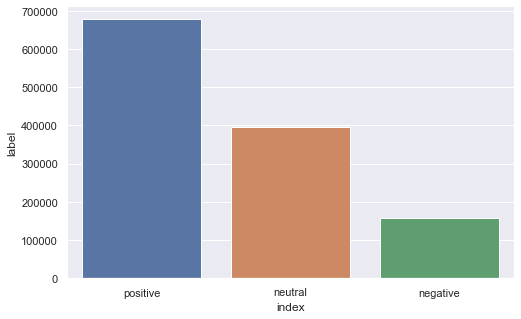

In [31]:
plt.figure(figsize=(8,5)) 
sns.barplot(x='index',y='label',data=counts_df)

In [33]:
#plotting with the regard to date 
data_agg=data[['user_name','Dates','label']]
display(data_agg.head(5))

user_name       Dates     label
0     51695  2009-04-26  positive
1     44916  2019-10-17  positive
2    159669  2014-11-10  positive
3     43176  2019-09-28  positive
4     10573  2016-02-03  positive

In [32]:
data.head(2)

user_name       Dates                                               text  \
0     51695  2009-04-26  blue ridge bank shares halted nyse bitcoin atm...   
1     44916  2019-10-17   today thats thursday  take  friend leowanders...   

      label  
0  positive  
1  positive

In [34]:
data_agg=data_agg.groupby(['Dates','label'])
display(data_agg.head(5))

user_name       Dates     label
0           51695  2009-04-26  positive
1           44916  2019-10-17  positive
2          159669  2014-11-10  positive
3           43176  2019-09-28  positive
4           10573  2016-02-03  positive
...           ...         ...       ...
1232176    140514  2017-07-12  negative
1232339    131516  2008-10-15  negative
1232346     91994  2008-10-01  negative
1232361    160430  2007-10-11   neutral
1232568     77918  2008-10-22  positive

[73611 rows x 3 columns]

In [35]:
data_agg=data_agg.count()
display(data_agg.head(5))

user_name
Dates      label              
1970-01-01 negative          1
           neutral           1
           positive          5
2006-03-21 neutral           1
           positive          1

In [36]:
data_agg=data_agg.reset_index()
display(data_agg.head(5))

Dates     label  user_name
0  1970-01-01  negative          1
1  1970-01-01   neutral          1
2  1970-01-01  positive          5
3  2006-03-21   neutral          1
4  2006-03-21  positive          1

In [37]:
#the 'user_name' is the count of users, so need to change the column name
data_agg.columns=['date','label','counts']
display(data_agg.head())

date     label  counts
0  1970-01-01  negative       1
1  1970-01-01   neutral       1
2  1970-01-01  positive       5
3  2006-03-21   neutral       1
4  2006-03-21  positive       1

In [38]:
px.line(data_agg,x='date',y='counts',color='label',
       title=' Tweet Sentimental Analysis')

In [39]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))
display(df)

user_name       Dates  \
0           51695  2009-04-26   
1           44916  2019-10-17   
2          159669  2014-11-10   
3           43176  2019-09-28   
4           10573  2016-02-03   
...           ...         ...   
1232804     14693  2009-05-21   
1232805    111396  2021-09-08   
1232806     44796  2020-07-27   
1232807    123360  2012-08-08   
1232808     72579  2021-01-29   

                                                      text  
0        blue ridge bank shares halted nyse bitcoin atm...  
1         today thats thursday  take  friend leowanders...  
2           guys evening read article btc would like share  
3        btc big chance billion price    bitcoin fx btc...  
4        network secured   nodes today soon biggest bea...  
...                                                    ...  
1232804  speedupbsc debipada adatiers golfgrinder first...  
1232805    time happen us sec coinbasebtc eth coinbase sec  
1232806                                      one btc  egld  
1232807  want join group posted tsla  day trade went lt...  
1232808  cabanacrypto live cabanacrypto hex happy hour ...  

[1232809 rows x 3 columns]

In [40]:
from wordcloud import WordCloud

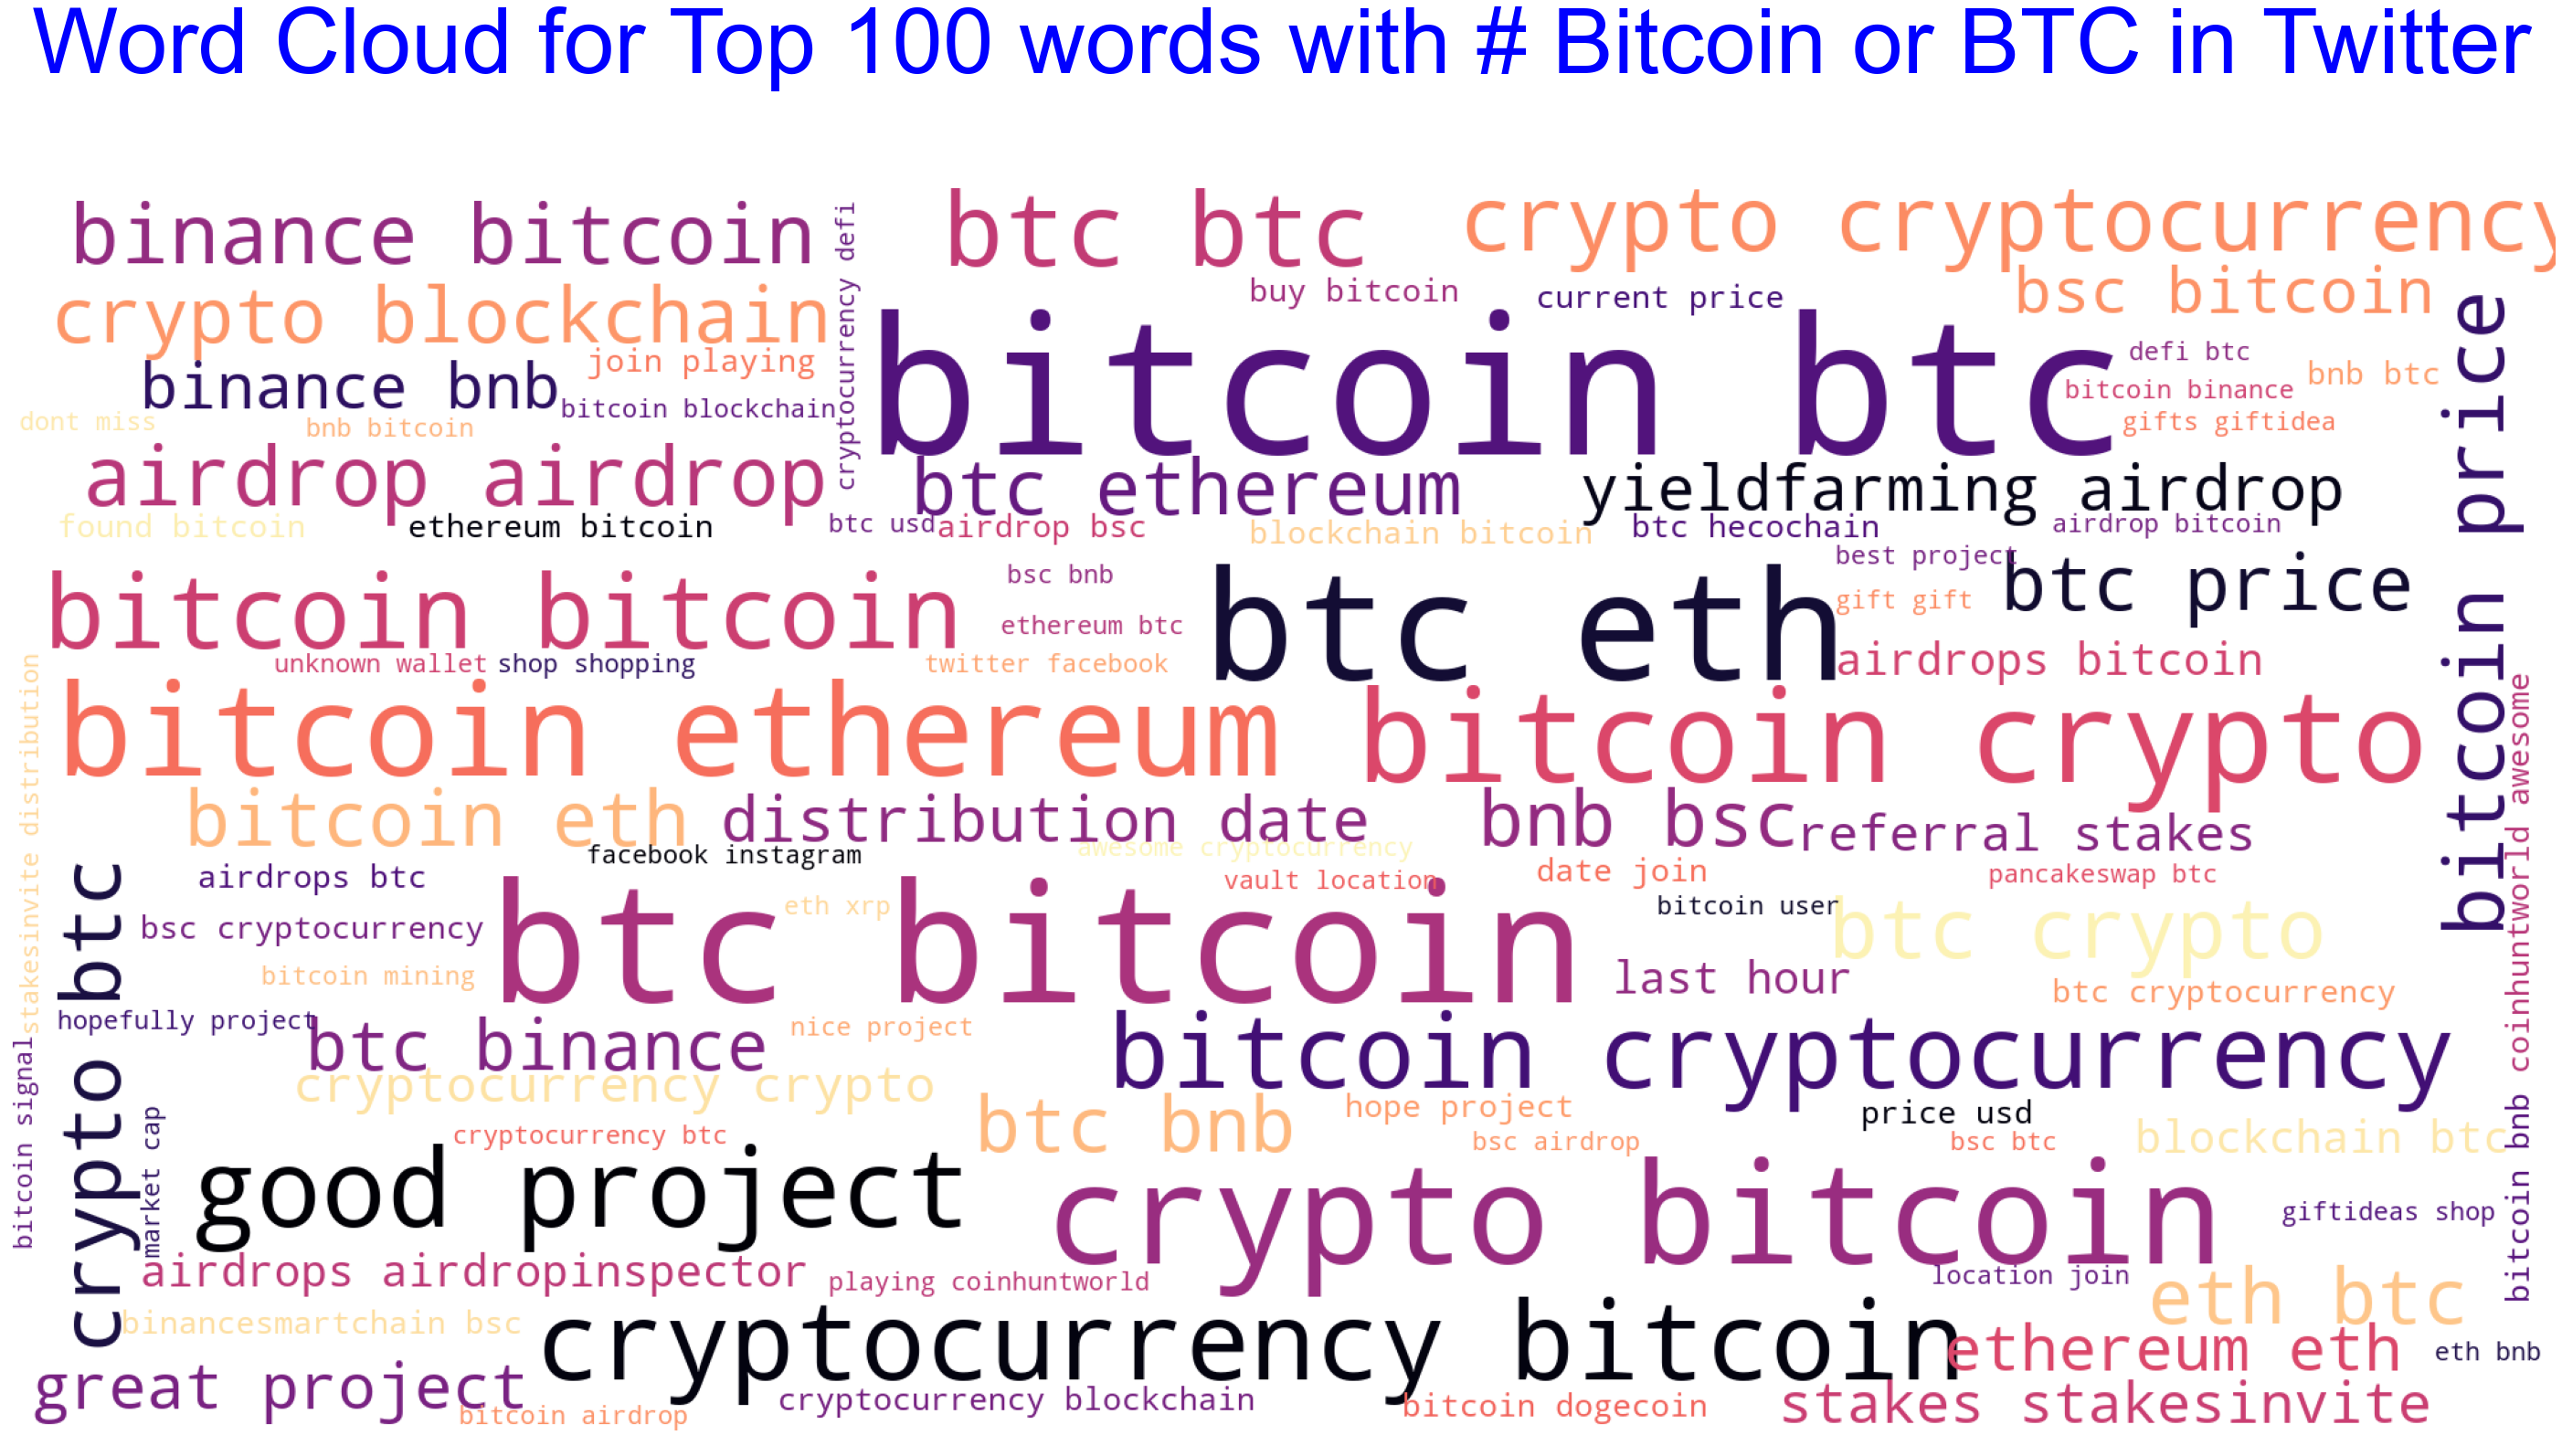

In [41]:
cut_text = " ".join(df.text)
max_words=100
word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(stop_words),
                    max_words=max_words,
                    max_font_size=30,
                    scale=5,
    colormap='magma',
                    random_state=1).generate(cut_text)
fig = plt.figure(1, figsize=(50,50))
plt.axis('off')
plt.title('Word Cloud for Top '+str(max_words)+' words with # Bitcoin or BTC in Twitter\n', fontsize=100,color='blue')
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()